In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('Corona_NLP_test.csv')
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [4]:
# lower case and remove stopwords
stop = stopwords.words('english')

df['ot_tokens'] = df['OriginalTweet'].apply(lambda x: x.lower())
df['ot_tokens'] = df['ot_tokens'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,ot_tokens
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending: new yorkers encounter empty supermar...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,"find hand sanitizer fred meyer, turned #amazon..."
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,find protect loved ones #coronavirus. ?


In [5]:
# tokenize
df['ot_tokens'] = df['ot_tokens'].apply(word_tokenize)
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,ot_tokens
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,"[trending, :, new, yorkers, encounter, empty, ..."
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,"[find, hand, sanitizer, fred, meyer, ,, turned..."
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,"[find, protect, loved, ones, #, coronavirus, ...."


In [51]:
# remove common unmeaningful characters/strings
ignore_vals = ['#','.',',','?',':','@','!',';','&','https','...','-','(',')']
df['ot_tokens'] = df['ot_tokens'].apply(lambda x: [w for w in x if w not in ignore_vals])

In [52]:
# create series of word frequencies
freq_table = pd.value_counts(np.hstack(df['ot_tokens']))
freq_table.head(20)

covid_19       1541
coronavirus    1515
food           1332
store          1012
grocery         816
people          783
stock           780
amp             610
covid-19        555
shopping        522
supermarket     515
online          509
panic           483
prices          434
need            366
toilet          361
paper           355
like            334
get             327
covid19         306
Name: count, dtype: int64

In [53]:
# convert frequency table to dictionary for wordcloud
data = freq_table.to_dict()
data

{'covid_19': 1541,
 'coronavirus': 1515,
 'food': 1332,
 'store': 1012,
 'grocery': 816,
 'people': 783,
 'stock': 780,
 'amp': 610,
 'covid-19': 555,
 'shopping': 522,
 'supermarket': 515,
 'online': 509,
 'panic': 483,
 'prices': 434,
 'need': 366,
 'toilet': 361,
 'paper': 355,
 'like': 334,
 'get': 327,
 'covid19': 306,
 'buying': 288,
 "'s": 284,
 'go': 262,
 'going': 256,
 'please': 248,
 'local': 245,
 'covid': 243,
 '19': 241,
 'retail': 238,
 'us': 230,
 'time': 228,
 'home': 226,
 'coronaviruspandemic': 219,
 'shelves': 214,
 'buy': 211,
 'stores': 204,
 'everyone': 202,
 'work': 196,
 'due': 194,
 'today': 194,
 'i': 192,
 'help': 188,
 'consumer': 187,
 'covid2019': 179,
 '``': 173,
 "''": 165,
 '$': 165,
 'demand': 163,
 'supplies': 163,
 'coronaoutbreak': 158,
 'one': 153,
 'virus': 152,
 'pandemic': 149,
 'don\x92t': 149,
 'stay': 144,
 'hand': 139,
 'water': 138,
 'even': 137,
 'coronapocalypse': 136,
 'still': 134,
 'empty': 132,
 'many': 128,
 'would': 128,
 'went': 1

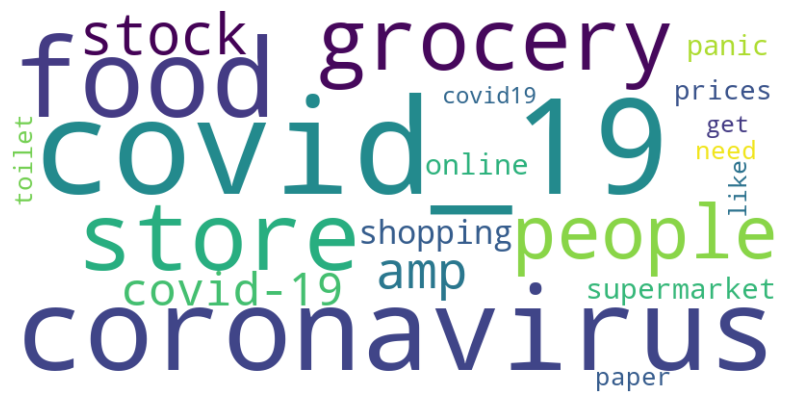

In [54]:
# create wordcloud of top 20 words
wc = WordCloud(width=800, height=400, max_words = 20, background_color='white').generate_from_frequencies(freq_table)

# plot wc
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()